# ECDF plots

In [1]:
# uncomment the following:

library('tidyverse')
options(repr.plot.width = 4, repr.plot.height = 3, repr.plot.res = 300)

Warning message:
“Failed to locate timezone database”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


This cell provides the data 👇.

In [2]:
otter.data = read.csv('https://jcoliver.github.io/learn-r/data/otter-mandible-data.csv') %>%
    gather(characteristic, value, -species, -museum, -accession) %>%
     drop_na() %>%
     group_by(species, characteristic) %>%
     arrange(value) %>%
     mutate(ecdf_y = row_number() / n()) %>%
     ungroup()

 otter.data %>% head

species,museum,accession,characteristic,value,ecdf_y
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
A. cinerea,AMNH,101471,m5,8.245,0.04347826
A. cinerea,AMNH,101461,m5,8.340,0.08695652
A. cinerea,AMNH,101466,m5,9.430,0.13043478
A. cinerea,Smithsonian,314979,m5,9.510,0.17391304
A. cinerea,AMNH,101459,m5,9.600,0.21739130
A. cinerea,AMNH,101470,m5,9.985,0.26086957


Make an ECDF plot of `value` and:
- facet by characteristic
- allow the x-axis of each facetted plot to be independent (for the value of the the `scales` argument in `facet_wrap` use `"free_x"`)
- color/group by species  

Species names are typically italicized. Use `theme` and `element_text` to adjust the legend text so that it is italic.

Which otter species has the smallest skull?

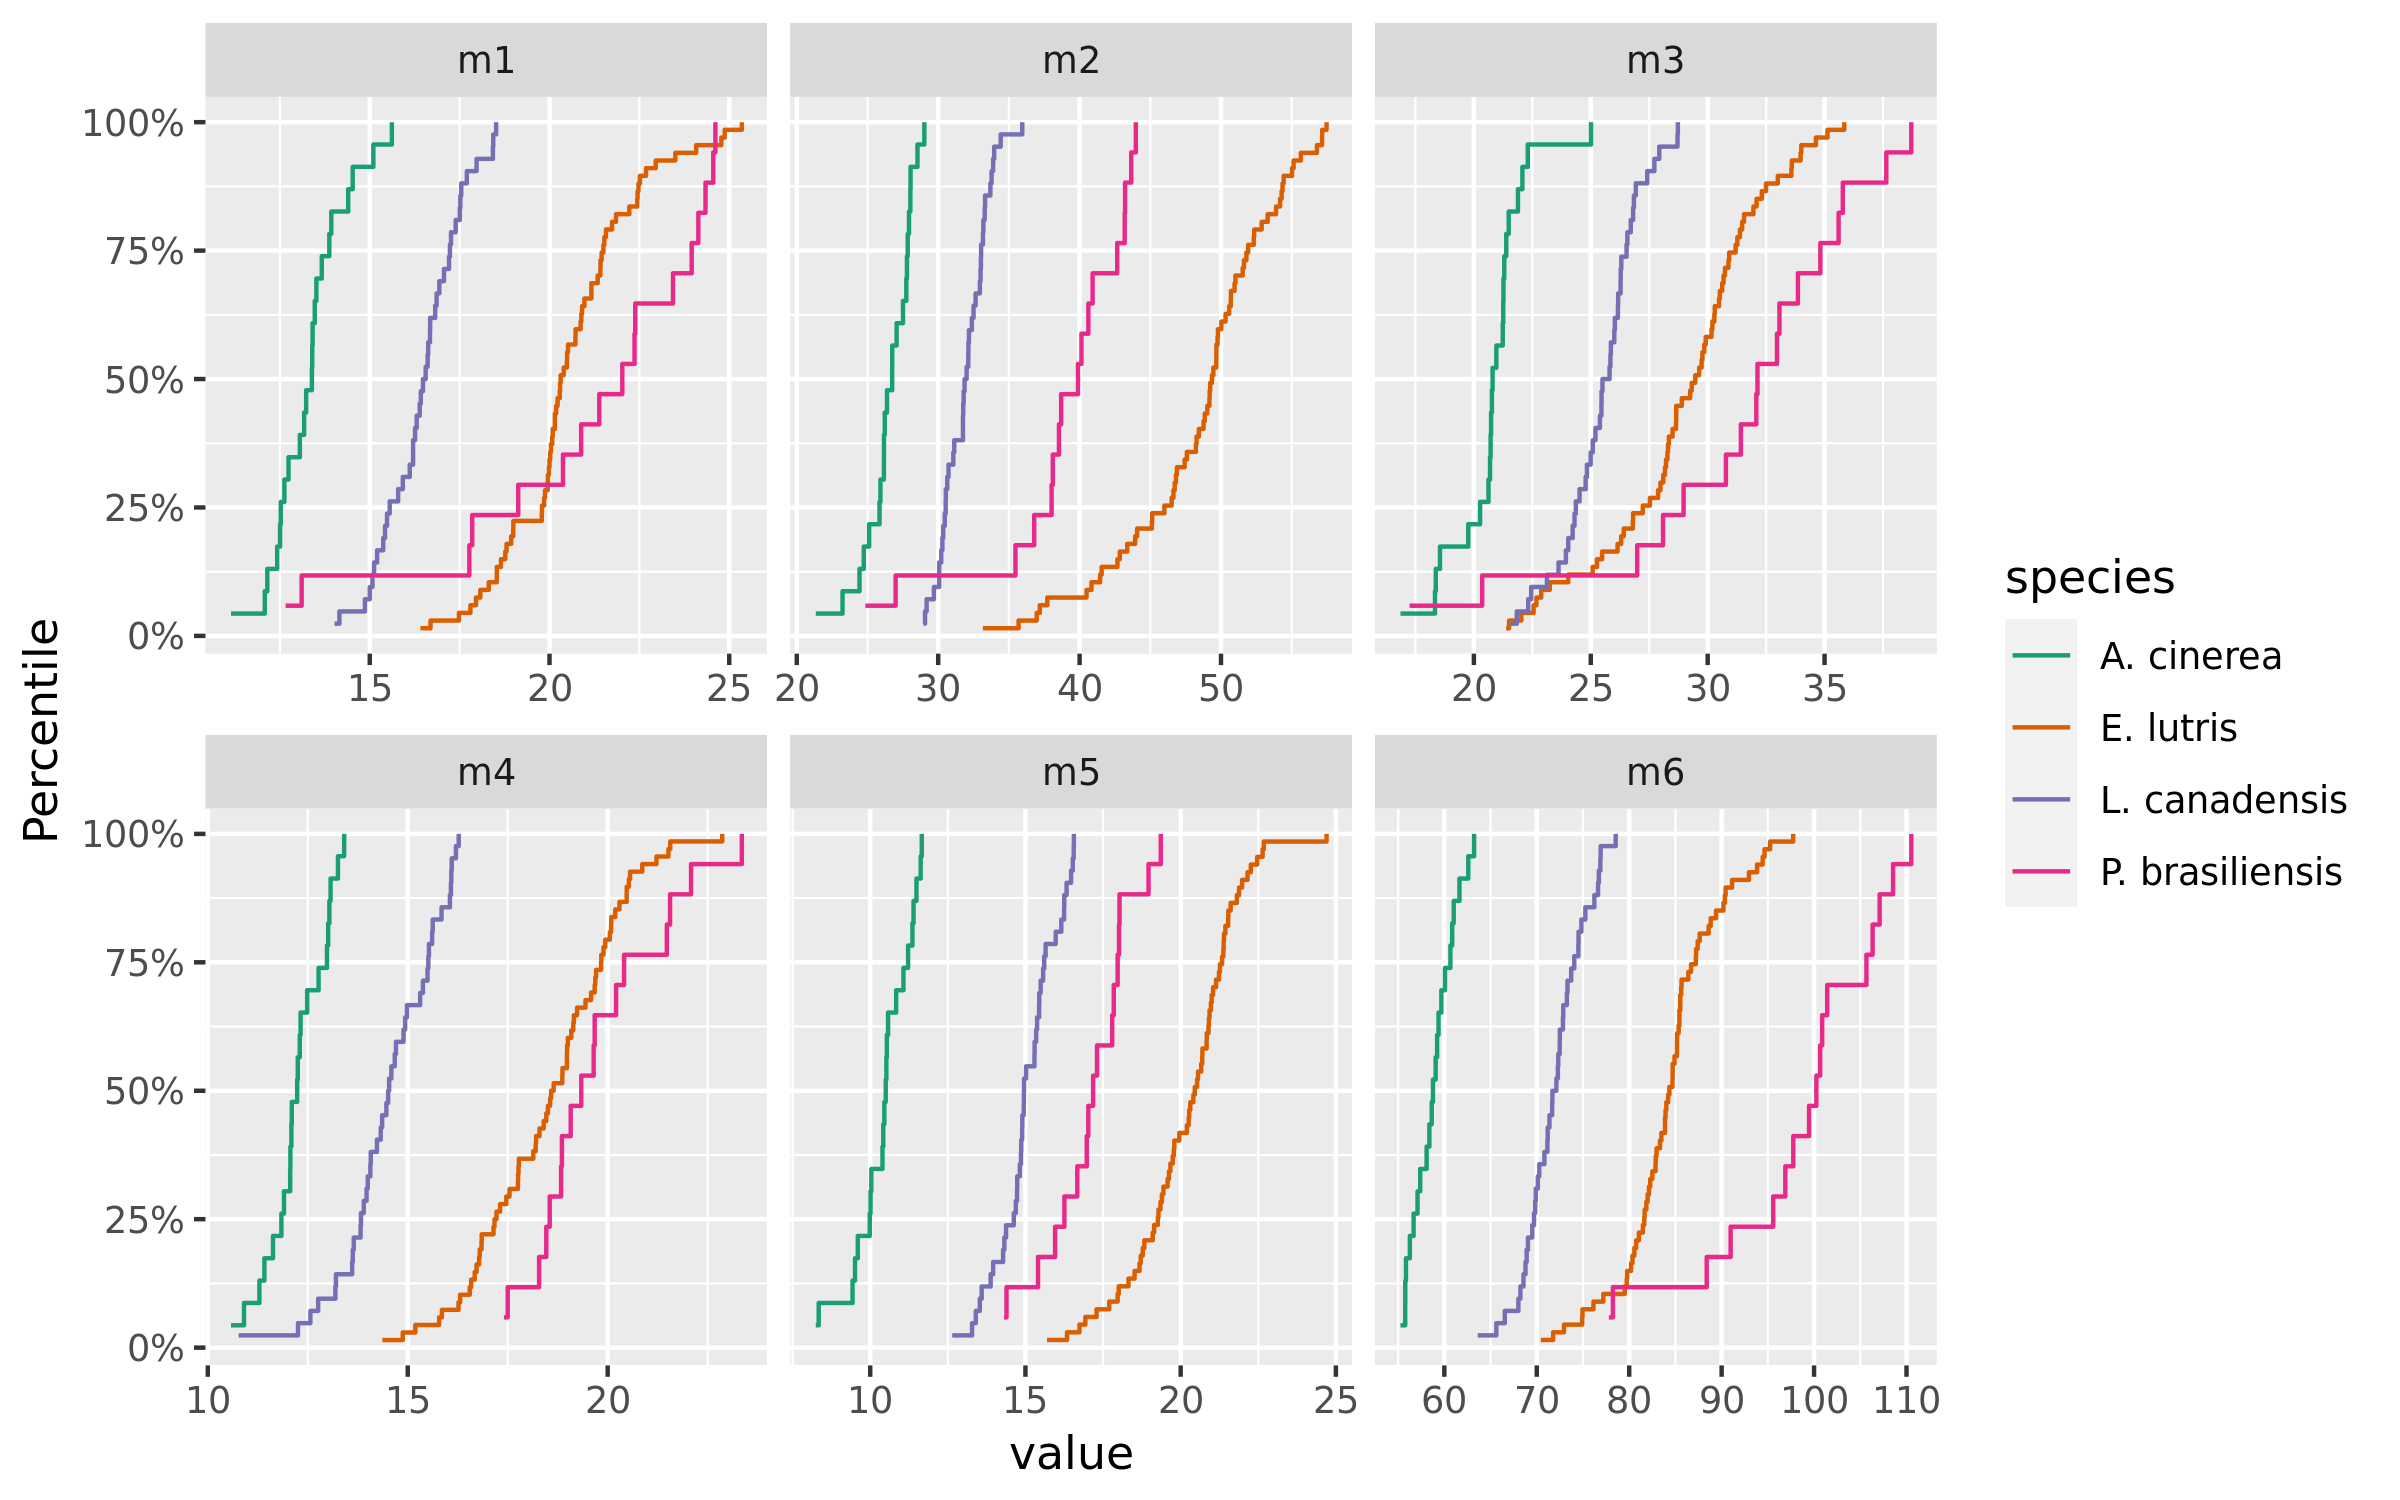

In [9]:
options(repr.plot.width=8, repr.plot.height=5)
p=ggplot(otter.data, aes(x=value, y=ecdf_y, color=species)) + geom_step(direction='hv') +
facet_wrap(~characteristic, scales='free_x') +
scale_y_continuous(labels=scales::percent_format()) +
scale_color_brewer(palette='Dark2') +
labs(y='Percentile')
p

You can uncomment the following line and change the cell type to `markdown` to see what the solution should look like 👇. 

<img src="ecdf_otter_skull.png" />

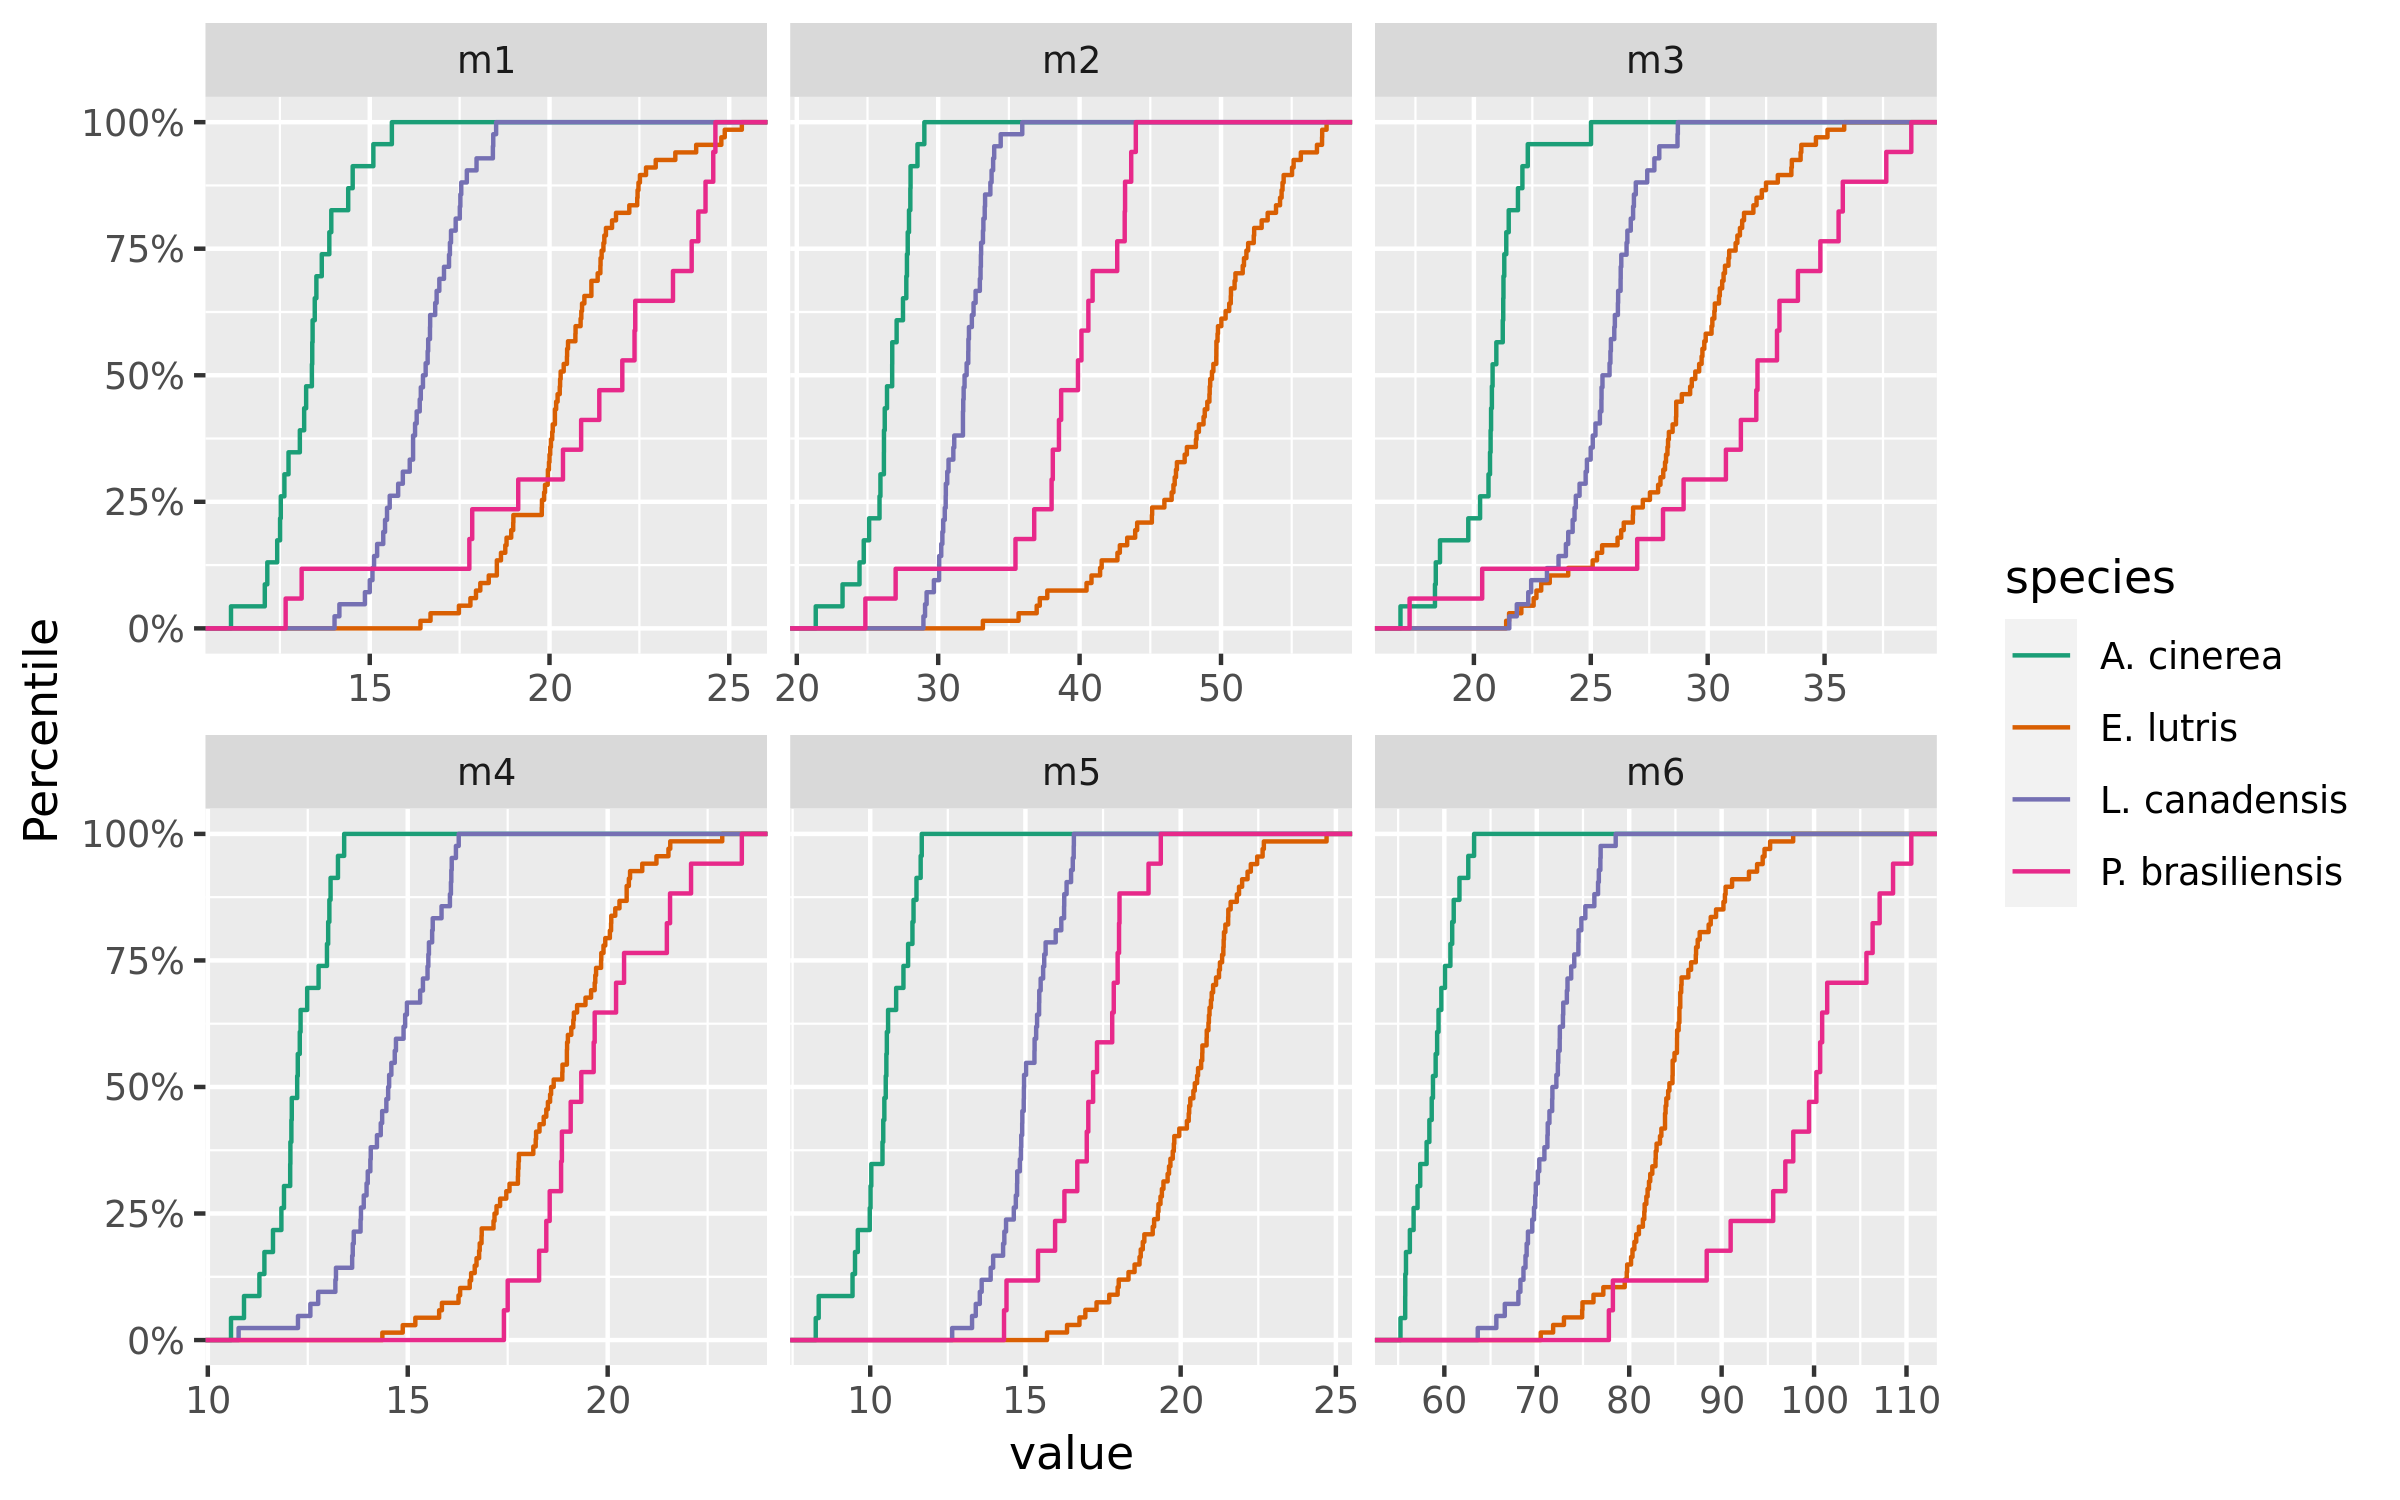

In [10]:
options(repr.plot.width=8, repr.plot.height=5)
p=ggplot(otter.data, aes(x=value, color=species)) + 
stat_ecdf() +
facet_wrap(~characteristic, scales='free_x') +
scale_y_continuous(labels=scales::percent_format()) +
scale_color_brewer(palette='Dark2') +
labs(y='Percentile') +
theme_gray()
p